In [1]:
import streamlit as st
import pandas as pd
from mplsoccer import VerticalPitch,Pitch, Sbopen
import json
import matplotlib as mpl

In [6]:
import matplotlib.pyplot as plt  # Ensure you import this
%matplotlib inline
import matplotlib.image as mpimg

In [2]:
sb = Sbopen()
df_event,df_related, df_freeze, df_tactics = sb.event(3930158)

In [4]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3373 non-null   object 
 1   index                           3373 non-null   int64  
 2   period                          3373 non-null   int64  
 3   timestamp                       3373 non-null   object 
 4   minute                          3373 non-null   int64  
 5   second                          3373 non-null   int64  
 6   possession                      3373 non-null   int64  
 7   duration                        2417 non-null   float64
 8   match_id                        3373 non-null   int64  
 9   type_id                         3373 non-null   int64  
 10  type_name                       3373 non-null   object 
 11  possession_team_id              3373 non-null   int64  
 12  possession_team_name            33

In [ ]:
df_lineup = sb.lineup(match_id)

In [ ]:
df_tactics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jersey_number     66 non-null     int64 
 1   match_id          66 non-null     int64 
 2   id                66 non-null     object
 3   player_id         66 non-null     int64 
 4   player_name       66 non-null     object
 5   position_id       66 non-null     int64 
 6   position_name     66 non-null     object
 7   event_tactics_id  66 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 4.2+ KB


In [8]:
#df_frame, df_visible = sb.frame(3930158)

# exploring the data
#df_frame.info()


In [9]:
df_event.head(5)

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_name,foul_committed_penalty,foul_won_penalty,substitution_replacement_id,substitution_replacement_name,pass_cut_back,foul_committed_advantage,foul_won_advantage,dribble_overrun,shot_deflected
0,f2207d37-beed-4073-84a5-f9d696e2afdd,1,1,00:00:00,0,0,1,0.000000,3930158,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43e494fe-4871-4b2a-a509-a325c17a5e3f,2,1,00:00:00,0,0,1,0.000000,3930158,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d9de8fe7-3122-4067-a1c2-a742c7edb2b8,3,1,00:00:00,0,0,1,0.000000,3930158,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,455f819f-3926-4ed4-a0e9-4e9e4d0bf95a,4,1,00:00:00,0,0,1,0.000000,3930158,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,df6f6fb7-f0b0-4561-9171-f4172f5e97e7,5,1,00:00:01.191000,0,1,2,1.234945,3930158,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#df_related.head(5)

In [11]:
#df_freeze.head(5)

In [119]:
df_tactics.head(22)

,jersey_number,match_id,id,player_id,player_name,position_id,position_name,event_tactics_id
0,1,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,5570,Manuel Neuer,1,Goalkeeper,1
1,6,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,5579,Joshua Kimmich,2,Right Back,2
2,2,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,3167,Antonio Rüdiger,3,Right Center Back,3
3,4,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,8221,Jonathan Tah,5,Left Center Back,4
4,18,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,12407,Maximilian Mittelstädt,6,Left Back,5
5,23,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,9195,Robert Andrich,9,Right Defensive Midfield,6
6,8,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,5574,Toni Kroos,11,Left Defensive Midfield,7
7,10,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,39565,Jamal Musiala,17,Right Wing,8
8,21,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,10287,İlkay Gündoğan,19,Center Attacking Midfield,9
9,17,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,40724,Florian Wirtz,21,Left Wing,10


In [13]:
#df_event.to_csv('scotlandvgermany.csv')

In [14]:
df_event.groupby(['team_name','player_name'])['outcome_name'].apply(lambda x: (x=='Goal').sum()).reset_index(name='Goals_scored' )

,team_name,player_name,Goals_scored
0,Germany,Antonio Rüdiger,0
1,Germany,Emre Can,1
2,Germany,Florian Wirtz,1
3,Germany,Jamal Musiala,1
4,Germany,Jonathan Tah,0
5,Germany,Joshua Kimmich,0
6,Germany,Kai Havertz,1
7,Germany,Leroy Sané,0
8,Germany,Manuel Neuer,0
9,Germany,Maximilian Mittelstädt,0


In [15]:
pass_df = df_event[(df_event['type_name'] == 'Pass') & (df_event['pass_goal_assist'] == True)]
pass_df.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_name,foul_committed_penalty,foul_won_penalty,substitution_replacement_id,substitution_replacement_name,pass_cut_back,foul_committed_advantage,foul_won_advantage,dribble_overrun,shot_deflected
447,76b03cff-22f8-4a32-b4a0-35607970ad95,448,1,00:09:54.013000,9,54,19,1.072779,3930158,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,204b6fd6-64e8-48d7-95ee-64891d36d86d,872,1,00:18:41.633000,18,41,29,0.698917,3930158,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3364,e4e23d31-0422-4527-b0ba-7ff04e7e1fde,3365,2,00:47:30.334000,92,30,137,1.390506,3930158,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
def most_assist(df, team_name):
    team_data= df[df['team_name'] == team_name]

    if team_data.empty:
        return {"message": f"No data available for team: {team_name}"}
    
    assists = team_data[(team_data['type_name'] == 'Pass') & (team_data['pass_goal_assist'] == True)]
    assists_cnt = assists['player_name'].value_counts()

    if assists_cnt.empty:
        return {"team": team_name,"player": None, "assists": 0}
    
    top_player = assists_cnt.idxmax()
    top_assists = assists_cnt.max()

    return {"team": team_name,"player": top_player, "Assists": top_assists}

In [17]:
most_assist(df_event,'Germany')

{'team': 'Germany', 'player': 'Joshua Kimmich', 'Assists': 1}

## Competition level analysis
* top_goalscorer
* top_assists
* top_fouls_committed
* most_chances_created
* successful_pases
* successful_dribbles
* most_tackles_won
* most_touches
* most_clean_sheets
* team_of_the_season

In [18]:
def most_goals(df):
    
    df_goals = df.groupby(['team_name','player_name'])['outcome_name'].apply(lambda x: (x=='Goal').sum()).reset_index(name='Goals_scored')
    highest_scorer = df_goals.loc[df_goals["Goals_scored"].idxmax()]

    return {"team": highest_scorer['team_name'],"player":highest_scorer['player_name'], "goals_scored": highest_scorer['Goals_scored']}


goalscorer = most_goals(df_event)
print(goalscorer)

{'team': 'Germany', 'player': 'Emre Can', 'goals_scored': 1}


In [19]:
def most_fouls(df):
   
   # If no red cards, compute fouls committed per player
    df_fouls = (df.groupby(['team_name','player_name'])["type_name"].apply(lambda x: (x == "Foul Committed").sum()).reset_index(name="Foul_committed"))

    # Get player with most fouls
    top_foul_player = df_fouls.loc[df_fouls["Foul_committed"].idxmax()]

    return {
        "team": top_foul_player["team_name"],   
        "foul_player": top_foul_player["player_name"],
        "fouls_committed": int(top_foul_player["Foul_committed"]),
    }

# Example usage
result = most_fouls(df_event)
print(result)


{'team': 'Germany', 'foul_player': 'Robert Andrich', 'fouls_committed': 4}


In [20]:
def most_assist(df):
    
    assists = df[(df['type_name'] == 'Pass') & (df['pass_goal_assist'] == True)]
    assists_cnt = assists.groupby(['team_name','player_name']).size().reset_index(name="Assists")

    if assists_cnt.empty:
        return {"team": None, "player": None, "Assists": 0}

    most_assist_player = assists_cnt.loc[assists_cnt["Assists"].idxmax()]

    return {"team": most_assist_player['team_name'],"player": most_assist_player['player_name'], "Assists": int(most_assist_player['Assists'])}

result = most_assist(df_event)
print(result)

{'team': 'Germany', 'player': 'Joshua Kimmich', 'Assists': 1}


In [21]:
def most_successful_passes(df):

    successful_passes = df[(df['type_name'] == 'Pass') & (df['outcome_name'].isna())]
    pass_cnt = successful_passes.groupby(['team_name','player_name']).size().reset_index(name="Successful_passes")

    most_successful_pass_player = pass_cnt.loc[pass_cnt["Successful_passes"].idxmax()]

    return {"team":most_successful_pass_player['team_name'],"player":most_successful_pass_player['player_name'],"Total_passes": int(most_successful_pass_player['Successful_passes'])}

result = most_successful_passes(df_event)
print(result)

{'team': 'Germany', 'player': 'Toni Kroos', 'Total_passes': 100}


In [22]:
def most_successful_dribbles(df):

    dribbles = df[(df['type_name'] == 'Dribble') & (df['outcome_name'] == 'Complete')]
    dribbles_cnt = dribbles.groupby(['team_name','player_name']).size().reset_index(name="Dribbles")

    if dribbles_cnt.empty:
        return {"team": None, "player": None, "Dribbles": 0}

    most_dribbles_player = dribbles_cnt.loc[dribbles_cnt["Dribbles"].idxmax()]

    return {"team": most_dribbles_player['team_name'],"player": most_dribbles_player['player_name'], "Dribbles": int(most_dribbles_player['Dribbles'])}

result = most_successful_dribbles(df_event)
print(result)

{'team': 'Germany', 'player': 'Jamal Musiala', 'Dribbles': 5}


In [23]:
def most_tackels_won(df):

    tackles = df[(df['sub_type_name'] == "Tackle") & ((df['outcome_name'] == 'Won') | (df['outcome_name'] == 'Success In Play')  | (df['outcome_name'] == 'Success Out')) ]
    tackles_cnt = tackles.groupby(['team_name','player_name']).size().reset_index(name='Tackles')

    if tackles_cnt.empty:
        return {"team": None, "player": None, "Tackles" : 0}

    most_tackles_player = tackles_cnt.loc[tackles_cnt['Tackles'].idxmax()]

    return {"team":  most_tackles_player['team_name'], "player": most_tackles_player['player_name'], "Tackles" : int(most_tackles_player['Tackles'])}

result = most_tackels_won(df_event)
print(result['team'])

Scotland


In [24]:
def most_clean_sheets(df):

    goalkeepers = df[df['position_name'] == "Goalkeeper"] [['match_id','player_name','team_name']]
    goals = df[(df['type_name'] == 'Shot') & (df['outcome_name'] == "Goal")]

    clean_sheets = goalkeepers.groupby(['player_name','team_name','match_id']).first().reset_index()
    clean_sheets = clean_sheets[~clean_sheets['match_id'].isin(goals['match_id'])]

    clean_sheet_cnt = clean_sheets.groupby(['team_name','player_name']).size().reset_index(name="clean_sheets")

    if clean_sheet_cnt.empty:
        return {"message": "No clean sheets were recorded in this tournament."}
    
    top_clean_sheet_gk = clean_sheet_cnt.loc[clean_sheet_cnt['clean_sheets'].idxmax()]


    return {"team": top_clean_sheet_gk['team_name'],"goalkeepeer": top_clean_sheet_gk['player_name'],"clean_sheets":int(top_clean_sheet_gk['clean_sheets'])}

result = most_clean_sheets(df_event)
print(result)

{'message': 'No clean sheets were recorded in this tournament.'}


In [25]:
def most_interceptions(df):

    interceptions = df[(df['type_name'] == 'Pass') & (df['sub_type_name'] == 'Interception')]
    interception_cnt = interceptions.groupby(['team_name','player_name']).size().reset_index(name='Interception')

    if interception_cnt.empty:
        return {"team": None, "player": None, "Interceptions" : 0}

    most_interceptions_player = interception_cnt.loc[interception_cnt['Interception'].idxmax()]

    return {"team":  most_interceptions_player['team_name'], "player": most_interceptions_player['player_name'], "Interceptions" : int(most_interceptions_player['Interception'])}

result = most_interceptions(df_event)
print(result['team'])

Germany


In [26]:
def most_blocks(df):

    blocks = df[df['type_name'] == 'Block']
    blocks_cnt = blocks.groupby(['team_name','player_name']).size().reset_index(name='Block')

    if blocks_cnt.empty:
        return {"team": None, "player": None, "Blocks" : 0}

    most_blocks_player = blocks_cnt.loc[blocks_cnt['Block'].idxmax()]

    return {"team":  most_blocks_player['team_name'], "player": most_blocks_player['player_name'], "Blocks" : int(most_blocks_player['Block'])}

result = most_blocks(df_event)
print(result['team'])

Germany


In [27]:
def most_clearance(df):

    clearances = df[df['type_name'] == 'Clearance']
    clearances_cnt = clearances.groupby(['team_name','player_name']).size().reset_index(name='Clearrance')

    if clearances_cnt.empty:
        return {"team": None, "player": None, "Clearances" : 0}

    most_clearances_player = clearances_cnt.loc[clearances_cnt['Clearrance'].idxmax()]

    return {"team":  most_clearances_player['team_name'], "player": most_clearances_player['player_name'], "Clearances" : int(most_clearances_player['Clearrance'])}

result = most_clearance(df_event)
print(result['team'])

Germany


In [28]:
def most_saves(df):

    saves = df[(df['type_name'] == 'Goal Keeper') & (df['sub_type_name'] == 'Shot Saved')]
    saves_cnt = saves.groupby(['team_name','player_name']).size().reset_index(name='Saves')

    if saves_cnt.empty:
        return {"team": None, "player": None, "Saves" : 0}

    most_saves_player = saves_cnt.loc[saves_cnt['Saves'].idxmax()]

    return {"team":  most_saves_player['team_name'], "player": most_saves_player['player_name'], "Saves" : int(most_saves_player['Saves'])}

result = most_saves(df_event)
print(result['team'])

Scotland


In [ ]:
def save_percentage(df):
    
    # Filter for saves
    saves = df[(df['type_name'] == 'Goal Keeper') & (df['sub_type_name'] == 'Shot Saved')]
    saves_cnt = saves.groupby(['team_name', 'player_name']).size().reset_index(name='Saves')

    # Filter for shots faced
    shots_faced = df[(df['type_name'] == 'Goal Keeper') & (df['sub_type_name'] == 'Shot Faced')]
    shots_faced_cnt = shots_faced.groupby(['team_name', 'player_name']).size().reset_index(name='Shots Faced')

    # Merge saves and shots faced
    save_percentage_df = saves_cnt.merge(shots_faced_cnt, on=['team_name', 'player_name'], how="inner")

    # **Check if DataFrame is empty before calculations**
    if save_percentage_df.empty:
        return {"team": None, "player": None, "Save Percent": 0.00}

    # **Filter out cases where 'Shots Faced' == 0**
    save_percentage_df = save_percentage_df[save_percentage_df['Shots Faced'] > 0]

    # **Check again after filtering**
    if save_percentage_df.empty:
        return {"team": None, "player": None, "Save Percent": 0.00}

    # **Calculate Save Percentage Correctly**
    save_percentage_df['Save_Percent'] = round((save_percentage_df['Saves'] / save_percentage_df['Shots Faced']) * 100, 2)

    # **Get Goalkeeper with the Best Save Percentage**
    if save_percentage_df['Save_Percent'].empty:
        return {"team": None, "player": None, "Save Percent": 0.00}

    top_save_percent = save_percentage_df.loc[save_percentage_df['Save_Percent'].idxmax()]

    return {
        "team": top_save_percent['team_name'],"player": top_save_percent['player_name'],"Save Percent": float(top_save_percent['Save_Percent'])
    }

# Example usage
result = save_percentage(df_event)
print(result)


{'team': 'Scotland', 'player': 'Angus Gunn', 'Save Percent': 50.0}


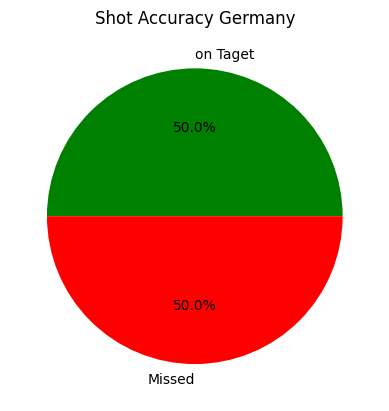

In [80]:
def shot_accuracy(df,team_name):
    team_data = df[df['team_name'] == team_name]

    total_shots = team_data[team_data['type_name'] == 'Shot'].shape[0]
    shots_on_target = team_data[(team_data['type_name'] == 'Shot') & (( team_data['outcome_name'] == 'Goal') | (team_data['outcome_name'] == 'Saved'))].shape[0]

    missed_shots = total_shots - shots_on_target
    shot_accuracy = round((shots_on_target / total_shots) * 100,2) if total_shots > 0 else 0

    # Pie Chart
    fig,ax = plt.subplots()
    ax.pie([shots_on_target,missed_shots],labels = ["on Taget","Missed"],autopct="%1.1f%%", colors = ["green","red"])
    ax.set_title(f"Shot Accuracy {team_name}")

    return fig

result = shot_accuracy(df_event,"Germany")
result.show()

In [6]:
df_event.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'aerial_won', 'outcome_id', 'outcome_name',
       'ball_recovery_recovery_failure', 'counterpress', 'pass_switch',
       'technique_id', 'technique_name', 'out', 'foul_won_defensive',
       'off_camera', 'pass_cross', 'pass_assisted_shot_id', 'pass_goal_assist',
       'shot_statsbomb_xg', 'end_z', 'shot_key_pass_id', 'shot_first_time',
       'goalkeeper_position_id', 'goalkeeper_position_name', 

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


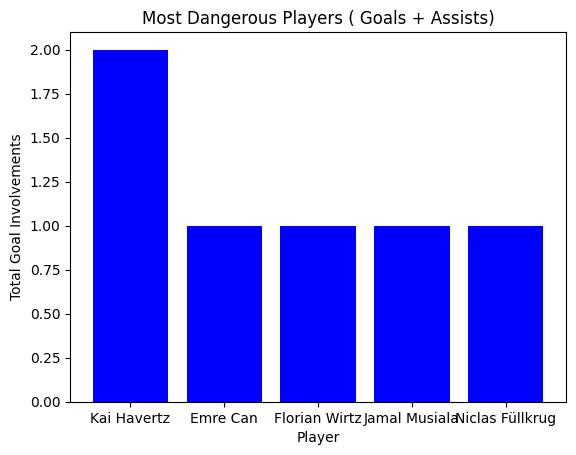

In [ ]:
def most_dangerous_attacking_players(df,team_name):
    team_data = df[df['team_name'] == team_name]

    ##Count_goals
    goals = team_data[(team_data['type_name'] == 'Shot') & (team_data['outcome_name'] =='Goal')]
    goals_cnt = goals.groupby('player_name').size().reset_index(name = "Goals")

    ## Count assists
    assists = team_data[(team_data['type_name'] == 'Pass') & (team_data['pass_goal_assist'] == True)]
    assists_cnt = assists.groupby('player_name').size().reset_index(name="Assists")

    ## Mergeing goals and assists
    goal_involvements = goals_cnt.merge(assists_cnt,on= 'player_name',how= 'outer').fillna(0)
    goal_involvements['Total Involvements'] = goal_involvements["Goals"] + goal_involvements["Assists"]
    goal_involvements = goal_involvements.sort_values("Total Involvements",ascending = False).head(5)

    ##plotting figure
    fig,ax = plt.subplots()
    ax.bar(goal_involvements['player_name'],goal_involvements["Total Involvements"],color = 'blue')
    ax.set_title("Most Dangerous Players ( Goals + Assists)")
    ax.set_xlabel("Player")
    ax.set_ylabel("Total Goal Involvements")
    ax.set_xticklabels(goal_involvements['player_name'],rotation = 45,ha="right")

    return fig

fig1 = most_dangerous_attacking_players(df_event,"Germany")
fig1.show()

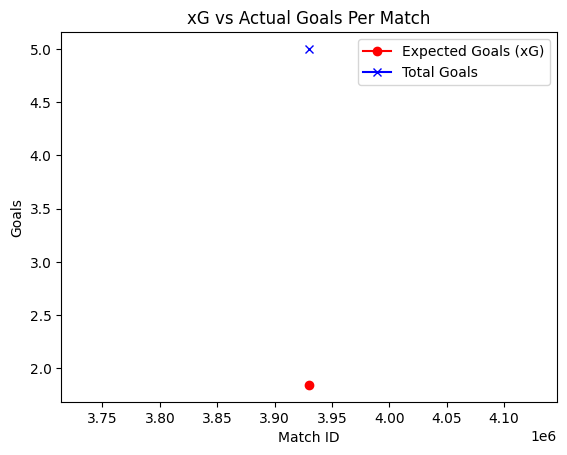

In [32]:
def xg_vs_goal(df,team_name):
    team_data = df[df['team_name'] == team_name]

    xg_data = team_data.groupby("match_id")['shot_statsbomb_xg'].sum().reset_index(name = 'Total xG')
    goals = team_data[(team_data['type_name'] == 'Shot') & (team_data['outcome_name'] =='Goal')]
    goals_data = goals.groupby('match_id').size().reset_index(name = "Total Goals")

    match_data = xg_data.merge(goals_data,on = 'match_id', how = 'left').fillna(0)

    ##plotting
    fig,ax = plt.subplots()
    ax.plot(match_data['match_id'], match_data["Total xG"],label = "Expected Goals (xG)", color = 'red',marker = 'o')
    ax.plot(match_data['match_id'], match_data["Total Goals"],label = "Total Goals", color = 'blue',marker = 'x')
    ax.set_title("xG vs Actual Goals Per Match")
    ax.set_xlabel("Match ID")
    ax.set_ylabel("Goals")
    ax.legend()

    return fig

fig1 = xg_vs_goal(df_event,"Germany")
fig1.show()


In [35]:
import numpy as np
import seaborn as sns

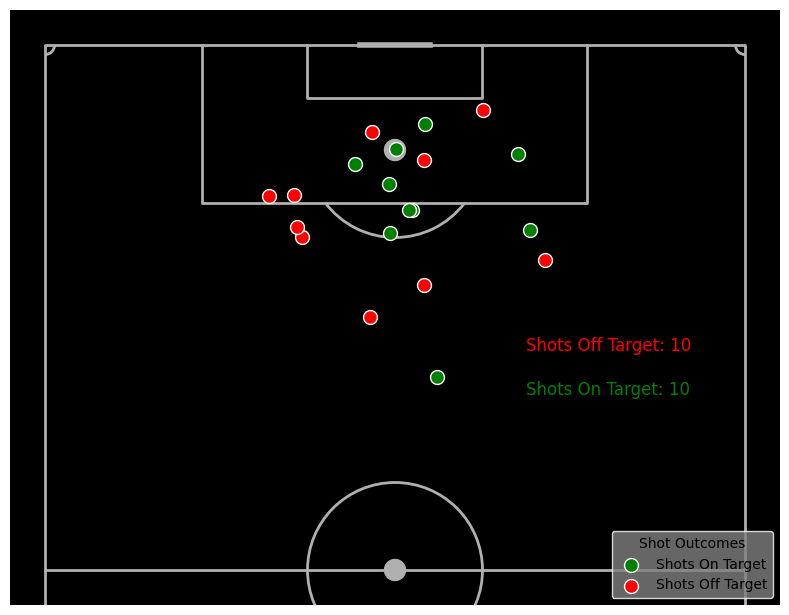

In [68]:
def plot_shots( df,team_name):
    team_data = df[df['team_name'] == team_name]

    ## Filter shot data
    shots = team_data[team_data["type_name"] == "Shot"]

    #3 separte on target and off target
    shots_on_target = shots[(team_data['outcome_name'] == 'Goal') | (team_data['outcome_name'] == 'Saved')]
    shots_off_target = shots[~((team_data['outcome_name'] == 'Goal') | (team_data['outcome_name'] == 'Saved'))]

    pitch = VerticalPitch(pitch_type ='statsbomb',half = True,corner_arcs=True,spot_scale=0.01,pitch_color = "black")
    fig,ax = pitch.draw(figsize=(8,8))

    ## PLot different shot types
    pitch.scatter(shots_on_target["x"],shots_on_target["y"],color = "green", s = 100, label = "Shots On Target",edgecolors="white",ax= ax)
    pitch.scatter(shots_off_target["x"],shots_off_target["y"],color = "red", s = 100, label = "Shots Off Target",edgecolors="white",ax= ax)

    ## adding shot count text
    pitch.text(80,55, f"Shots On Target: {len(shots_on_target)}",color = "Green",fontsize = 12,ax= ax)
    pitch.text(85,55, f"Shots Off Target: {len(shots_off_target)}",color = "Red",fontsize = 12,ax= ax)
    
    ax.legend(loc="lower right", fontsize=10, facecolor="gray", edgecolor="white", title="Shot Outcomes")

    return fig

sss = plot_shots(df_event,"Germany")
sss.show()

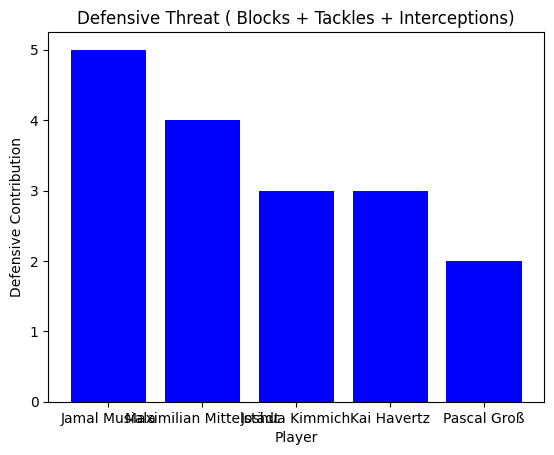

In [ ]:
def most_dangerous_defensive_players(df,team_name):
    team_data = df[df['team_name'] == team_name]

    ## Interceptions count
    interceptions = team_data[(team_data['type_name'] == 'Pass') & (team_data['sub_type_name'] == 'Interception')]
    interception_cnt = interceptions.groupby('player_name').size().reset_index(name='Interception')

    ## Blocks assists
    blocks = team_data[team_data['type_name'] == 'Block']
    blocks_cnt = blocks.groupby('player_name').size().reset_index(name='Block')

    ## Tackles count
    tackles = team_data[(team_data['sub_type_name'] == "Tackle") & ((team_data['outcome_name'] == 'Won') | (team_data['outcome_name'] == 'Success In Play')  | (team_data['outcome_name'] == 'Success Out')) ]
    tackles_cnt = tackles.groupby('player_name').size().reset_index(name='Tackles')

    ## Mergeing goals and assists
    defensive_involvements = tackles_cnt.merge(interception_cnt.merge(blocks_cnt,on= 'player_name',how= 'outer'),on = 'player_name',how = 'outer').fillna(0)
    defensive_involvements['Defensive Contribution'] = defensive_involvements["Interception"] + defensive_involvements["Block"] + defensive_involvements["Tackles"]
    defensive_involvements = defensive_involvements.sort_values("Defensive Contribution",ascending = False).head(5)

    ##plotting figure
    fig,ax = plt.subplots()
    ax.bar(defensive_involvements['player_name'],defensive_involvements["Defensive Contribution"],color = 'blue')
    ax.set_title("Defensive Threat ( Blocks + Tackles + Interceptions)")
    ax.set_xlabel("Player")
    ax.set_ylabel("Defensive Contribution")
    ax.set_xticklabels(defensive_involvements['player_name'],rotation = 45,ha="right")

    return fig

fig1 = most_dangerous_defensive_players(df_event,"Germany")
fig1.show()

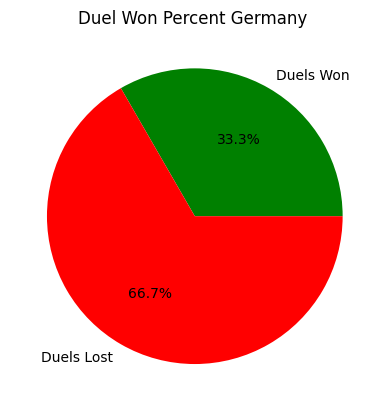

In [79]:
def duels_won_percent(df,team_name):
    team_data = df[df['team_name'] == team_name]

    total_duels = team_data[team_data['type_name'] == "Duel"].shape[0]

    aerial_lost = team_data[(team_data['type_name'] == 'Duel') & (team_data['sub_type_name'] == "Aerial Lost")].shape[0]
    ground_lost = team_data[(team_data['type_name'] == 'Duel') & (team_data['sub_type_name'] == "Tackle") & ((team_data['outcome_name'] == "Lost Out") | (team_data['outcome_name'] == "Lost In Play"))].shape[0]
    total_lost = aerial_lost + ground_lost 

    total_won = total_duels - total_lost
    duel_win_percent = round((total_won / total_duels)* 100,2) if total_duels > 0 else 0

    fig,ax = plt.subplots()
    ax.pie([total_won,total_lost], labels = ["Duels Won","Duels Lost"],autopct = "%1.1f%%", colors = ["green","red"])
    ax.set_title(f"Duel Won Percent {team_name} ")

    return fig


fig1 = duels_won_percent(df_event,"Germany")
fig1.show()


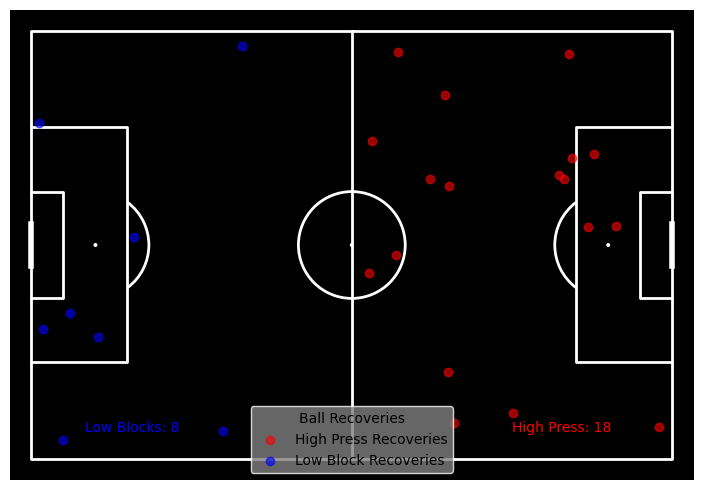

In [110]:
def pressing_zones(df,team_name):
    team_data = df[df['team_name'] == team_name]

    recoveries = team_data[team_data["type_name"] == "Ball Recovery"]

    high_press = recoveries[recoveries['x'] > 60.00]
    low_block = recoveries[recoveries['x'] <= 40.00]

    pitch = Pitch(pitch_type ='statsbomb',pitch_color="black",line_color='white')
    fig,ax = pitch.draw(figsize= (8,5))
    
    ax.scatter(high_press["x"],high_press["y"],color = "red",alpha=0.6,label= "High Press Recoveries")
    ax.scatter(low_block["x"],low_block["y"],color = "blue",alpha=0.6,label= "Low Block Recoveries")

    ax.text(10,75,f"Low Blocks: {len(low_block)}",color = "blue",fontsize = 10)
    ax.text(90,75,f"High Press: {len(high_press)}",color = "red",fontsize = 10)

    ax.legend(loc = "lower center",fontsize =10,facecolor = "gray",edgecolor="white",title="Ball Recoveries")


    return fig

zones = pressing_zones(df_event,"Germany")
zones.show()

In [ ]:
def fouls_and_cards(df,team_name):
    team_data = df[df['team_name'] == team_name]

    fouls = team_data[team_data["type_name"] == "Foul Committed"].groupby("player_name").size().reset_index(name = "Fouls")
    yellow_fouls = team_data[(team_data["foul_committed_card_name"] == "Yellow Card") | (team_data["foul_committed_card_name"] == "Second Yellow")]
    yellow_fouls_cnt = yellow_fouls.groupby("player_name").size().reset_index(name = "Yellow_fouls")
    yellow_behaviour= team_data[team_data["bad_behaviour_card_name"] == "Yellow Card"]
    yellow_behaviour_cnts = yellow_behaviour.groupby("player_name").size().reset_index(name ="Yellow_behaviour")
    
    yellows = yellow_fouls_cnt.merge(yellow_behaviour_cnts,on = "player_name",how = "outer").fillna(0)
    yellows["total_yellow_cards"] = yellows["Yellow_fouls"] + yellows["Yellow_behaviour"]

    red_fouls = team_data[team_data["foul_committed_card_name"] == "Red Card"]
    red_fouls_cnt = red_fouls.groupby("player_name").size().reset_index(name = "Red_fouls")
    red_behaviour= team_data[team_data["bad_behaviour_card_name"] == "Red Card"]
    red_behaviour_cnts = red_behaviour.groupby("player_name").size().reset_index(name ="Red_behaviour")

    reds = red_fouls_cnt.merge(red_behaviour_cnts,on = "player_name",how = "outer").fillna(0)
    reds["total_red_cards"] = reds["Red_fouls"] + reds["Red_behaviour"]


    foul_stats = fouls.merge(yellows, on="player_name", how="outer").merge(reds, on="player_name", how="outer").fillna(0)
    foul_stats = foul_stats[["player_name","Fouls","total_yellow_cards","total_red_cards"]]
    foul_stats = foul_stats.sort_values(by=["Fouls","total_yellow_cards","total_red_cards"],ascending = False ).head(5)
    colors = ["orange","yellow","red"]

    fig, ax = plt.subplots(figsize=(8, 5))
    foul_stats.plot(x="player_name", kind="bar", stacked=False, ax=ax,color = colors,edgecolor="black")
    ax.set_title("Fouls & Cards")
    ax.set_ylabel("Count")
    ax.set_xlabel("Player")

    ax.set_xticklabels(foul_stats['player_name'],rotation = 45,ha="right")

    ax.legend(["Fouls","total_yellow_cards","total_red_cards"], loc = "upper right", title = "Type")

    return fig

fig1 = fouls_and_cards(df_event,"Germany")
fig1.show()

KeyError: 'bad_behaviour_card_name'

In [91]:
euro = pd.read_csv('euro_2024_events.csv',low_memory=False)
euro.shape

(187858, 88)

In [92]:
euro.columns

Index(['Unnamed: 0', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'duration', 'match_id', 'type_id', 'type_name',
       'possession_team_id', 'possession_team_name', 'play_pattern_id',
       'play_pattern_name', 'team_id', 'team_name', 'tactics_formation',
       'player_id', 'player_name', 'position_id', 'position_name',
       'pass_recipient_id', 'pass_recipient_name', 'pass_length', 'pass_angle',
       'pass_height_id', 'pass_height_name', 'end_x', 'end_y', 'body_part_id',
       'body_part_name', 'sub_type_id', 'sub_type_name', 'x', 'y',
       'under_pressure', 'outcome_id', 'outcome_name', 'counterpress',
       'off_camera', 'foul_committed_advantage', 'foul_won_advantage',
       'technique_id', 'technique_name', 'shot_statsbomb_xg', 'end_z',
       'goalkeeper_position_id', 'goalkeeper_position_name', 'aerial_won',
       'pass_cross', 'out', 'pass_assisted_shot_id', 'pass_shot_assist',
       'shot_key_pass_id', 'foul_committed_penalty', 

In [95]:
Cols = []
for col in euro.columns:
    if euro[col].apply(lambda x: isinstance(x, str)).any():
        print(f"Column {col} has mixed types!")
        Cols.append(col)

Column id has mixed types!
Column timestamp has mixed types!
Column type_name has mixed types!
Column possession_team_name has mixed types!
Column play_pattern_name has mixed types!
Column team_name has mixed types!
Column player_name has mixed types!
Column position_name has mixed types!
Column pass_recipient_name has mixed types!
Column pass_height_name has mixed types!
Column body_part_name has mixed types!
Column sub_type_name has mixed types!
Column outcome_name has mixed types!
Column technique_name has mixed types!
Column goalkeeper_position_name has mixed types!
Column pass_assisted_shot_id has mixed types!
Column shot_key_pass_id has mixed types!
Column foul_committed_card_name has mixed types!
Column substitution_replacement_name has mixed types!
Column bad_behaviour_card_name has mixed types!


In [96]:
print(Cols)

['id', 'timestamp', 'type_name', 'possession_team_name', 'play_pattern_name', 'team_name', 'player_name', 'position_name', 'pass_recipient_name', 'pass_height_name', 'body_part_name', 'sub_type_name', 'outcome_name', 'technique_name', 'goalkeeper_position_name', 'pass_assisted_shot_id', 'shot_key_pass_id', 'foul_committed_card_name', 'substitution_replacement_name', 'bad_behaviour_card_name']


In [ ]:
num_cols = ["pass_assisted_shot_id","shot_key_pass_id"]
cat_cols = ["id","type_name","possession_team_name","team_name","player_name","pass_recipient_name","body_part_name","sub_type_name","outcome_name","foul_committed_card_name","substitution_replacement_name","bad_behaviour_card_name"]

In [ ]:
df["column_name"] = pd.to_numeric(df["column_name"], errors="coerce")  # Convert to number, set errors to NaN
df["column_name"] = df["column_name"].astype(str)  # Convert to string


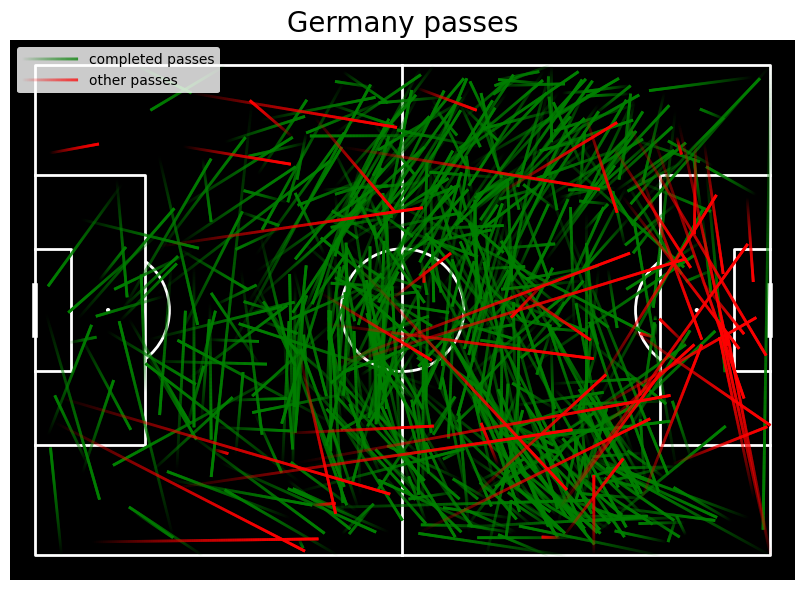

In [107]:
def pass_plot(df,team_name):
    mask_team = (df.type_name == "Pass") & (df.team_name == team_name)
    df_pass = df.loc[mask_team,['x','y','end_x','end_y','outcome_name']]
    mask_complete = df_pass.outcome_name.isnull()

    pitch = Pitch(pitch_type='statsbomb',pitch_color="black",line_color='white')
    fig,ax = pitch.draw(figsize=(10,6),tight_layout= True)

    lc1 = pitch.lines(df_pass[mask_complete].x,df_pass[mask_complete].y,df_pass[mask_complete].end_x,df_pass[mask_complete].end_y,lw=2,
                     transparent = True,label ='completed passes',color='green',ax=ax)
    
    lc2 = pitch.lines(df_pass[~mask_complete].x,df_pass[~mask_complete].y,df_pass[~mask_complete].end_x,df_pass[~mask_complete].end_y,lw=2,
                     transparent = True,label ='other passes',color='red',ax=ax)
    
    ax.legend(loc='upper left',handlelength=4,edgecolor = "None")

    ax_title = ax.set_title(f'{team_name} passes', fontsize = 20)

    return fig

maps = pass_plot(df_event,"Germany")
maps.show()


    

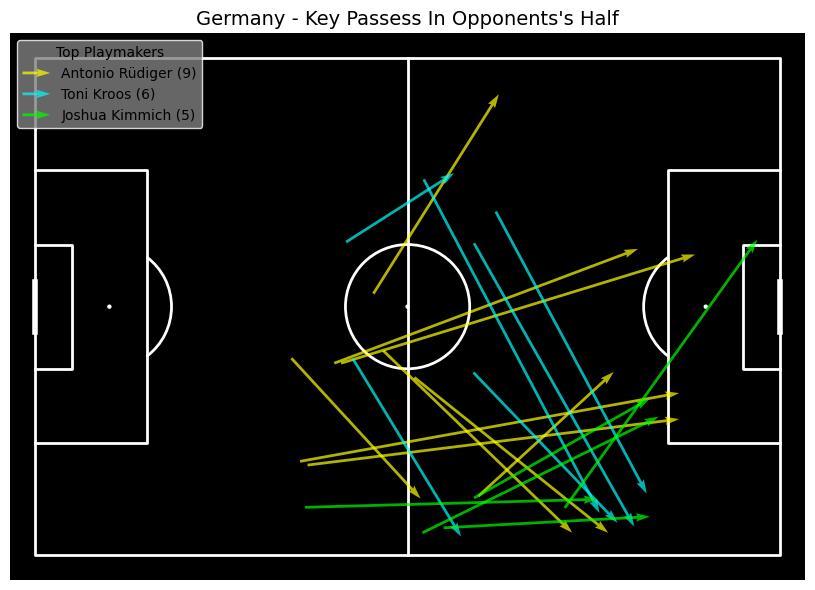

In [ ]:
def highlight_key_passer(df,team_name):
    team_data = df[(df['type_name'] == "Pass") & (df['team_name'] == team_name)].copy()
    team_data["progressive"] = ((team_data["end_x"] - team_data["x"]) > 0.3 * team_data["x"]) & ((team_data["x"] > 60) | (team_data["end_x"] > 60))

    progessive_passes = team_data[team_data["progressive"]]

    top_passers = progessive_passes.groupby("player_name").size().reset_index(name="progressive_passes")
    top_passers = top_passers.sort_values("progressive_passes",ascending = False).head(3)

    top_passer_names = top_passers['player_name'].tolist()
    top_pass_data = progessive_passes[progessive_passes["player_name"].isin(top_passer_names)]

    pitch = Pitch(pitch_color="black",line_color="white")
    fig,ax = pitch.draw(figsize=(10,6))

    colors =["yellow","cyan","lime"]

    for i,player in enumerate(top_passer_names):
        player_passes = top_pass_data[top_pass_data["player_name"] == player]
        pitch.arrows(player_passes["x"],player_passes["y"],player_passes["end_x"],player_passes["end_y"],ax=ax,
                     color = colors[i],width =2,alpha=0.7,label=f"{player} ({len(player_passes)})")
        

    ax.set_title(f"{team_name} - Key Passess In Opponents's Half",color = "black",fontsize = 14)
    ax.legend(loc="upper left",fontsize = 10,facecolor="gray",edgecolor ="white",title = "Top Playmakers")

    return fig


progressive_players = highlight_key_passer(df_event,"Germany")
progressive_players.show()

### Team of te Tournament

In [ ]:
team_tournament = pd.DataFrame({
    "team": ["France","England","Switzerland","France","Spain","Spain","Spain","Spain","Spain","Germany","Spain"],
    "player_name": ["Mike Maignan","Kyle Walker", "Manuel Akanji", "William Saliba","Marc Cucurella", "Rodri", "Dani Olmo", "Fabián Ruiz", "Lamine Yamal", "Jamal Musiala", "Nico Williams"],
    "position": ["Goalkeeper", "Right Back","Right Center Back" , "Left Center Back", "Left Back", "Right Defensive Midfield", "Center Attacking Midfield", "Left Defensive Midfield", "Right Center Forward", "Center Forward","Left Center Forward"],
    "position_id": [1,2,3,5,6,9,19,11,22,23,24],  
    "x": [12.0,31.2,31.2,31.2,31.2,50.4,88.8,50.4,108.0,108.0,108.0],
    "y": [40.0,70.0,50.0,30.0,10.0,56.0,40.0,24.0,56.0,40.0,24.0]
})

In [ ]:
team_logos={
    "England": "https://upload.wikimedia.org/wikipedia/en/thumb/b/be/Flag_of_England.svg/1280px-Flag_of_England.svg.png",
    "France": "https://upload.wikimedia.org/wikipedia/en/thumb/c/c3/Flag_of_France.svg/1280px-Flag_of_France.svg.png",
    "Germany": "https://upload.wikimedia.org/wikipedia/en/thumb/b/ba/Flag_of_Germany.svg/1280px-Flag_of_Germany.svg.png",
    "Spain": "https://upload.wikimedia.org/wikipedia/en/thumb/9/9a/Flag_of_Spain.svg/1280px-Flag_of_Spain.svg.png",
    "Switzerland": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Flag_of_Switzerland_%28Pantone%29.svg/188px-Flag_of_Switzerland_%28Pantone%29.svg.png" ,
}

Error loading flag for France
Error loading flag for England
Error loading flag for Switzerland
Error loading flag for France
Error loading flag for Spain
Error loading flag for Spain
Error loading flag for Spain
Error loading flag for Spain
Error loading flag for Spain
Error loading flag for Germany
Error loading flag for Spain


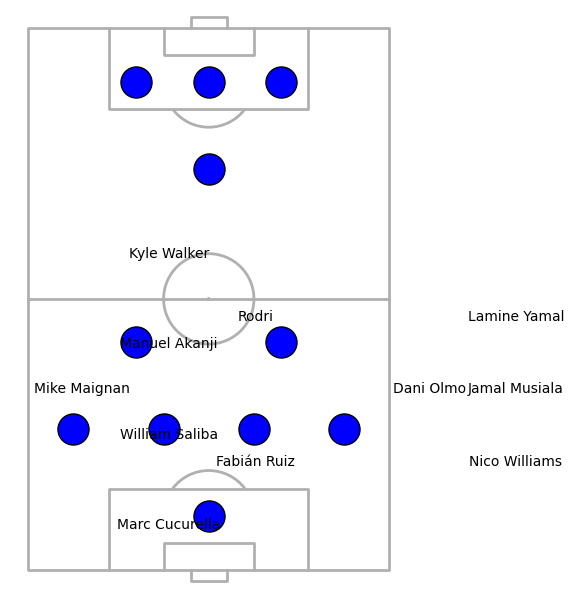

In [44]:

# 📌 Create Pitch
pitch = VerticalPitch(goal_type='box')
fig, ax = pitch.draw(figsize=(6, 8.72))

# 📌 Plot Player Names
for _, row in team_tournament.iterrows():
    ax.text(row['x'], row['y'], row['player_name'], ha='center', va='center', fontsize=10, color='black')

# 📌 Scatter Points for Players
pitch.scatter(team_tournament['x'], team_tournament['y'], s=500, color='blue', edgecolors='black', ax=ax)

# 📌 Load and Plot Flag Images
for _, row in team_tournament.iterrows():
    team = row['team']
    if team in team_logos:
        try:
            flag_img = mpimg.imread(team_logos[team], format='png')  # Load image
            ax.imshow(flag_img, extent=[row['x'] - 4, row['x'] + 4, row['y'] - 4, row['y'] + 4], zorder=3)  # Positioning
        except:
            print(f"Error loading flag for {team}")

plt.show()

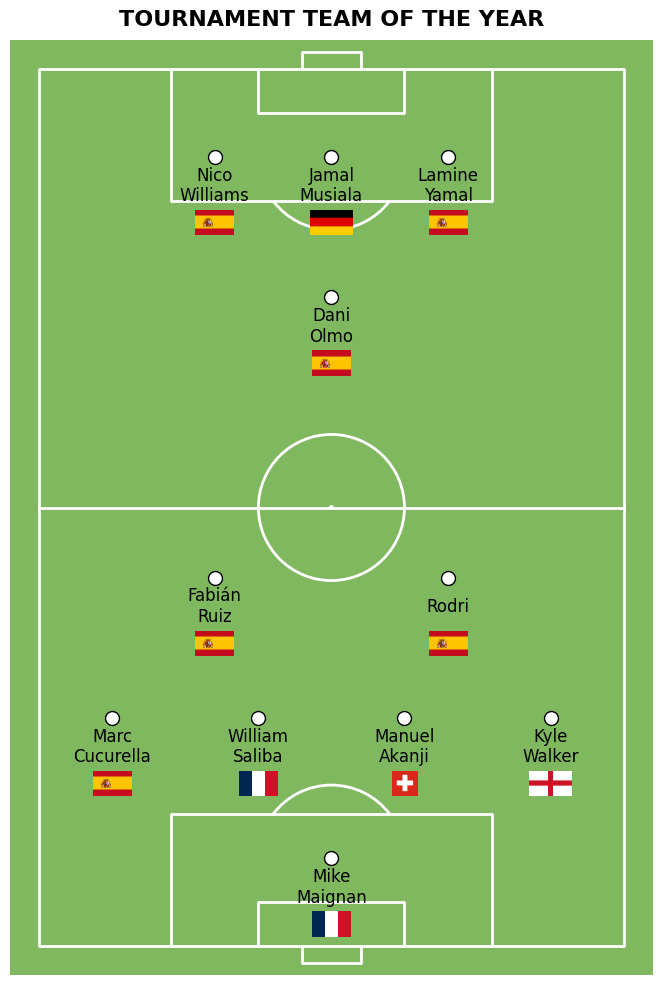

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
import matplotlib.image as mpimg
import requests
from io import BytesIO

# Load player data
team_tournament = pd.DataFrame({
    "team": ["France","England","Switzerland","France","Spain","Spain","Spain","Spain","Spain","Germany","Spain"],
    "player_name": ["Mike Maignan","Kyle Walker", "Manuel Akanji", "William Saliba","Marc Cucurella", "Rodri", "Dani Olmo", "Fabián Ruiz", "Lamine Yamal", "Jamal Musiala", "Nico Williams"],
    "position": ["Goalkeeper", "Right Back","Right Center Back" , "Left Center Back", "Left Back", "Right Defensive Midfield", "Center Attacking Midfield", "Left Defensive Midfield", "Right Wing", "Center Forward","Left Wing"],
    "position_id": [1,2,3,5,6,9,19,11,22,23,24]
})

# Team logos/flags
team_logos = {
    "England": "https://upload.wikimedia.org/wikipedia/en/thumb/b/be/Flag_of_England.svg/1280px-Flag_of_England.svg.png",
    "France": "https://upload.wikimedia.org/wikipedia/en/thumb/c/c3/Flag_of_France.svg/1280px-Flag_of_France.svg.png",
    "Germany": "https://upload.wikimedia.org/wikipedia/en/thumb/b/ba/Flag_of_Germany.svg/1280px-Flag_of_Germany.svg.png",
    "Spain": "https://upload.wikimedia.org/wikipedia/en/thumb/9/9a/Flag_of_Spain.svg/1280px-Flag_of_Spain.svg.png",
    "Switzerland": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Flag_of_Switzerland_%28Pantone%29.svg/188px-Flag_of_Switzerland_%28Pantone%29.svg.png"
}

# Define the formation
formation = "4-2-1-3"

# Function to load flag images
def load_flag_images(df, logo_dict):
    flag_images = []
    for _, row in df.iterrows():
        team = row['team']
        try:
            response = requests.get(logo_dict[team])
            img = plt.imread(BytesIO(response.content))
            flag_images.append(img)
        except:
            # Add a blank image if loading fails
            flag_images.append(plt.imread(BytesIO(requests.get("https://via.placeholder.com/50").content)))
    return flag_images

# Load flag images
flag_images = load_flag_images(team_tournament, team_logos)

# Create pitch
pitch = VerticalPitch(goal_type='box', pitch_color='#80B860', line_color='white')
fig, ax = pitch.draw(figsize=(8, 10))

# Add title
fig.suptitle('TOURNAMENT TEAM OF THE YEAR', fontsize=16, fontweight='bold')

# Add player names with line breaks for better display
ax_text = pitch.formation(
    formation, 
    positions=team_tournament.position_id, 
    kind='text',
    text=team_tournament.player_name.str.replace(' ', '\n'),
    va='center', 
    ha='center', 
    fontsize=12, 
    ax=ax,
    xoffset=-4
)

# Add flag images with offset to the left
ax_images = pitch.formation(
    formation, 
    positions=team_tournament.position_id, 
    kind='image',
    image=flag_images,
    height=3.5,  # Size of the images
    ax=ax,
    xoffset=-9  # Offset to the left
)

# Add player position markers
ax_scatter = pitch.formation(
    formation, 
    positions=team_tournament.position_id, 
    kind='scatter',
    s=100,  # Size of the dots
    color='white',
    edgecolors='black',
    linewidth=1,
    ax=ax
)


plt.tight_layout()
plt.show()

In [31]:
formation = pitch.get_formation('4213')
formation

[Position(name='GK', statsbomb=[1], opta=None, wyscout='gk', x=12.0, y=40.0, x_flip=108.0, y_flip=40.0, x_half=3.0, y_half=40.0, x_half_flip=117.0, y_half_flip=40.0),
 Position(name='RB', statsbomb=[2], opta=None, wyscout='rb', x=31.2, y=70.0, x_flip=88.8, y_flip=10.0, x_half=13.2, y_half=70.0, x_half_flip=106.8, y_half_flip=10.0),
 Position(name='RCB', statsbomb=[3], opta=None, wyscout='rcb', x=31.2, y=50.0, x_flip=88.8, y_flip=30.0, x_half=13.2, y_half=50.0, x_half_flip=106.8, y_half_flip=30.0),
 Position(name='LCB', statsbomb=[5], opta=None, wyscout='lcb', x=31.2, y=30.0, x_flip=88.8, y_flip=50.0, x_half=13.2, y_half=30.0, x_half_flip=106.8, y_half_flip=50.0),
 Position(name='LB', statsbomb=[6], opta=None, wyscout='lb', x=31.2, y=10.0, x_flip=88.8, y_flip=70.0, x_half=13.2, y_half=10.0, x_half_flip=106.8, y_half_flip=70.0),
 Position(name='RDM', statsbomb=[9], opta=None, wyscout='rdmf', x=50.4, y=56.0, x_flip=69.6, y_flip=24.0, x_half=23.4, y_half=56.0, x_half_flip=96.6, y_half_flip

In [7]:
pitch = Pitch()
print(pitch.formations)

['442', '41212', '433', '451', '4411', '4141', '4231', '4321', '532', '541', '352', '343', '31312', '4222', '3511', '3421', '3412', '3142', '31213', '4132', '424', '4312', '3241', '3331', 'pyramid', 'metodo', 'wm', '41221', '42211', '32221', '5221', '3232', '312112', '42121', '31222', '4213', '32122', '41131', '432', '441', '4311', '4221', '4131', '4212', '342', '3411', '351', '531', '431', '44', '422', '341', '53']


In [22]:
pitch = Pitch()
print(pitch.positions)

AttributeError: 'Pitch' object has no attribute 'positions'

In [120]:
df_tactics.head(22)

,jersey_number,match_id,id,player_id,player_name,position_id,position_name,event_tactics_id
0,1,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,5570,Manuel Neuer,1,Goalkeeper,1
1,6,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,5579,Joshua Kimmich,2,Right Back,2
2,2,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,3167,Antonio Rüdiger,3,Right Center Back,3
3,4,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,8221,Jonathan Tah,5,Left Center Back,4
4,18,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,12407,Maximilian Mittelstädt,6,Left Back,5
5,23,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,9195,Robert Andrich,9,Right Defensive Midfield,6
6,8,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,5574,Toni Kroos,11,Left Defensive Midfield,7
7,10,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,39565,Jamal Musiala,17,Right Wing,8
8,21,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,10287,İlkay Gündoğan,19,Center Attacking Midfield,9
9,17,3930158,f2207d37-beed-4073-84a5-f9d696e2afdd,40724,Florian Wirtz,21,Left Wing,10


In [5]:
team ="Germany"
df_pass = df_event.loc[(df_event.pass_assisted_shot_id.notnull()) & (df_event.team_name == team),['x','y','end_x','end_y','pass_assisted_shot_id']]

df_shot = (df_event.loc[(df_event.type_name == "Shot") & (df_event.team_name == team),['id','outcome_name','shot_statsbomb_xg']].rename({'id':'pass_assisted_shot_id'},axis =1))

df_pass = df_pass.merge(df_shot,how = 'left').drop('pass_assisted_shot_id',axis = 1)

mask_goal = df_pass.outcome_name == 'Goal'

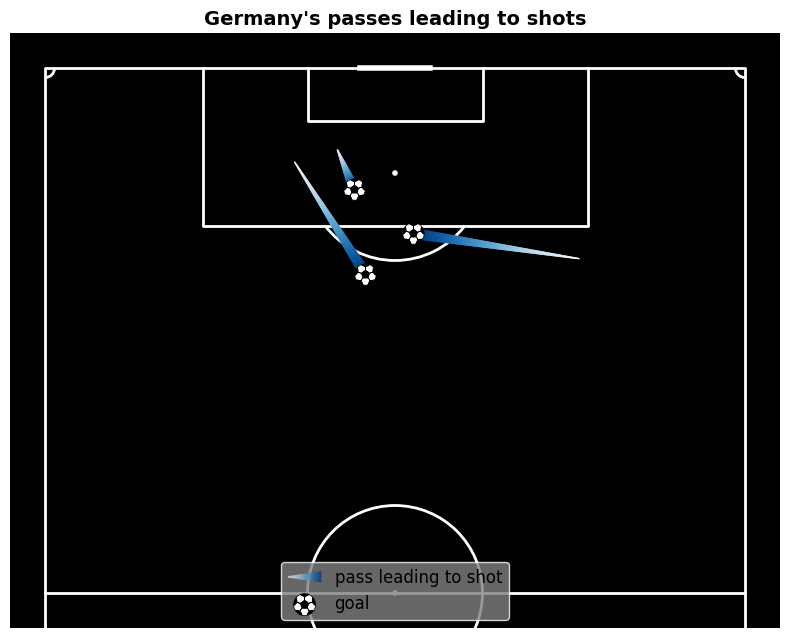

In [95]:
# Setup the pitch
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='black', line_color='white',
                      half=True,corner_arcs=True)
fig, axs = pitch.draw(figsize=(8,8))
#fig.set_facecolor('#22312b')

# Plot the completed passes
pitch.lines(df_pass[mask_goal].x, df_pass[mask_goal].y, df_pass[mask_goal].end_x, df_pass[mask_goal].end_y,
            lw=8, comet=True, cmap='Blues',
            label='pass leading to shot', ax=axs)

# Plot the goals
pitch.scatter(df_pass[mask_goal].end_x, df_pass[mask_goal].end_y, s=250,
              marker='football', edgecolors='black', c='white', zorder=2,
              label='goal', ax=axs)
# pitch.scatter(df_pass[~mask_goal].end_x, df_pass[~mask_goal].end_y,
#               edgecolors='white', c='red', s=200, zorder=2,
#               label='shot', ax=axs)

# endnote and title
axs.set_title(f"{team}'s passes leading to shots", color='black', fontsize=14,fontweight = 'bold')

# set legend
axs.legend(facecolor='gray', edgecolor='white', loc='lower center',fontsize=12)

plt.show()

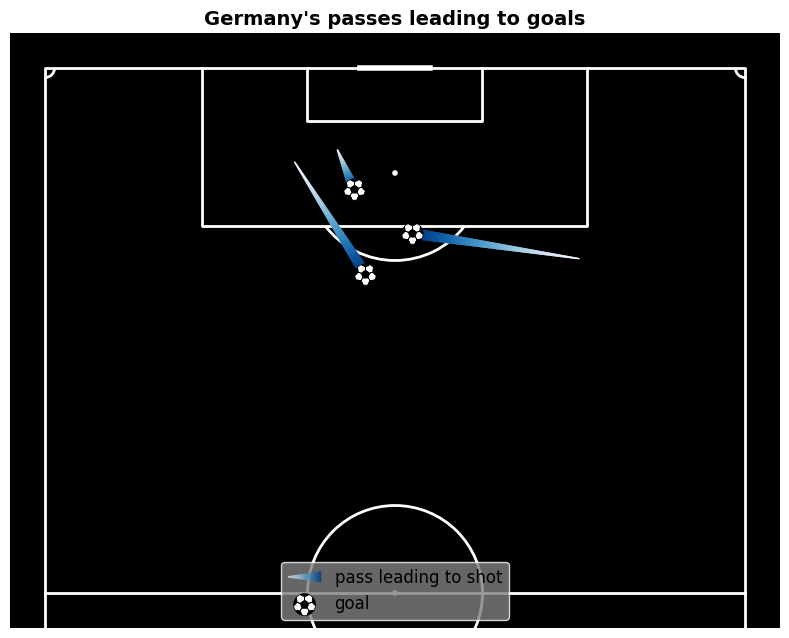

In [96]:
def passes_assisted_shot(df,team_name):
    df_pass = df.loc[(df.pass_assisted_shot_id.notnull()) & (df.team_name == team_name),['x','y','end_x','end_y','pass_assisted_shot_id']]

    df_shot = (df.loc[(df.type_name == "Shot") & (df.team_name == team_name),['id','outcome_name','shot_statsbomb_xg']].rename({'id':'pass_assisted_shot_id'},axis =1))

    df_pass = df_pass.merge(df_shot,how = 'left').drop('pass_assisted_shot_id',axis = 1)

    mask_goal = df_pass.outcome_name == 'Goal'

    # Setup the pitch
    pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='black', line_color='white',
                      half=True,corner_arcs=True)
    fig, axs = pitch.draw(figsize=(8,8))

# Plot the completed passes
    pitch.lines(df_pass[mask_goal].x, df_pass[mask_goal].y, df_pass[mask_goal].end_x, df_pass[mask_goal].end_y,
            lw=8, comet=True, cmap='Blues',
            label='pass leading to shot', ax=axs)

# Plot the goals
    pitch.scatter(df_pass[mask_goal].end_x, df_pass[mask_goal].end_y, s=250,
              marker='football', edgecolors='black', c='white', zorder=2,
              label='goal', ax=axs)
    # pitch.scatter(df_pass[~mask_goal].end_x, df_pass[~mask_goal].end_y,
    #           edgecolors='white', c='#22312b', s=200, zorder=2,
    #           label='shot', ax=axs)

# endnote and title
    axs.set_title(f"{team_name}'s passes leading to goals", color='black', fontsize=14,fontweight = 'bold')

# set legend
    axs.legend(facecolor='gray', edgecolor='white', loc='lower center',fontsize=12)

    return fig

pas = passes_assisted_shot(df_event,"Germany")
pas.show()    

In [1]:
def best_performers():
    return {
        "Player of the Tournament": {"player": "Rodri","team": "Spain"},
        "Young Player of the tournamnent": {"player": "Lamine Yamal","team": "Spain" },
        "Golden Glove" : {"player" : "Mike Maignan","team": "France"}
        
    }

performers = best_performers()

C:\Users\dhava\AppData\Local\Temp\ipykernel_16196\1981154494.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data['xg_scaled'] = team_data['shot_statsbomb_xg'] / max_xg  # Normalize between 0 and 1


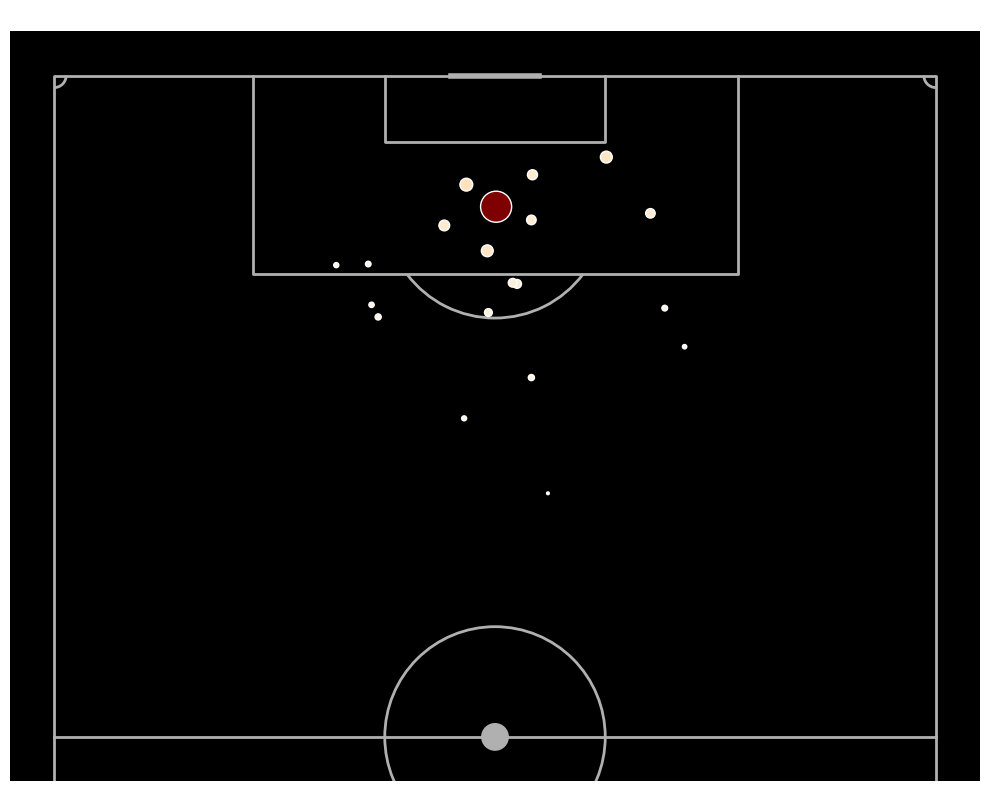

In [11]:
from mplsoccer import Pitch
import numpy as np

def plot_xg_shot_map(df, team_name):
    # Filter shots for the team
    team_data = df[(df['team_name'] == team_name) & (df['type_name'] == 'Shot')]

    # Normalize xG values for color scaling
    max_xg = max(team_data['shot_statsbomb_xg'])
    team_data['xg_scaled'] = team_data['shot_statsbomb_xg'] / max_xg  # Normalize between 0 and 1

    # Create pitch
    pitch = VerticalPitch(pitch_type ='statsbomb',half = True,corner_arcs=True,spot_scale=0.01,pitch_color = "black")
    fig,ax = pitch.draw(figsize=(10,8))

    # Plot shots with xG values as color
    scatter = pitch.scatter(
        team_data['x'], team_data['y'], s=500 * team_data['xg_scaled'], 
        c=team_data['xg_scaled'], cmap='OrRd', edgecolors='white', ax=ax)

    ax.set_title(f'Shot Map with xG Values - {team_name}', color='white')
    #fig.colorbar(scatter, ax=ax, label="Expected Goals (xG)")

    return fig

# Example usage
fig3 = plot_xg_shot_map(df_event, 'Germany')
fig3.show()


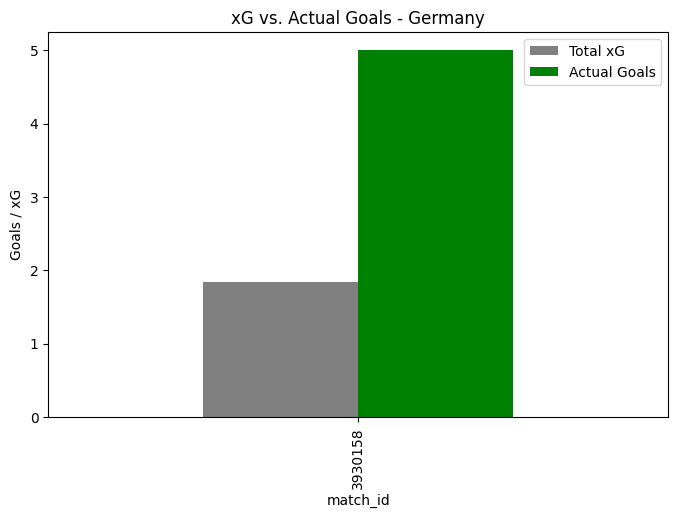

In [12]:
import matplotlib.pyplot as plt

def plot_xg_vs_goals(df, team_name):
    # Filter team data for shots
    team_data = df[(df['team_name'] == team_name) & (df['type_name'] == 'Shot')]

    # Group by match and sum xG and actual goals
    match_xg = team_data.groupby('match_id').agg({'shot_statsbomb_xg': 'sum', 'outcome_name': lambda x: (x == 'Goal').sum()}).reset_index()
    match_xg.rename(columns={'shot_statsbomb_xg': 'Total xG', 'outcome_name': 'Actual Goals'}, inplace=True)

    # Plot bar chart
    fig, ax = plt.subplots(figsize=(8, 5))
    match_xg.set_index('match_id')[['Total xG', 'Actual Goals']].plot(kind='bar', ax=ax, color=['gray', 'green'])
    ax.set_ylabel("Goals / xG")
    ax.set_title(f"xG vs. Actual Goals - {team_name}")

    return fig

# Example usage
fig2 = plot_xg_vs_goals(df_event, 'Germany')
fig2.show()


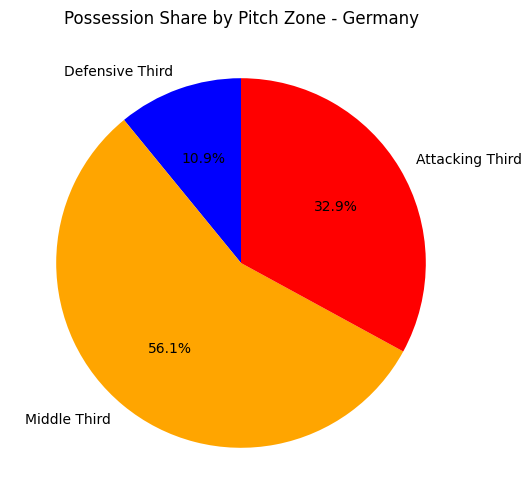

In [16]:


def plot_possession_share(df, team_name):
    # Filter data for the selected team
    team_data = df[df['team_name'] == team_name]

    # Define pitch thirds (StatsBomb pitch range: x from 0 to 120)
    defensive_third = team_data[team_data['x'] < 40]
    middle_third = team_data[(team_data['x'] >= 40) & (team_data['x'] <= 80)]
    attacking_third = team_data[team_data['x'] > 80]

    # Count passes in each third
    possession_counts = [len(defensive_third), len(middle_third), len(attacking_third)]
    labels = ['Defensive Third', 'Middle Third', 'Attacking Third']
    colors = ['blue', 'orange', 'red']

    # Plot pie chart
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(possession_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Possession Share by Pitch Zone - {team_name}')
    
    return fig

# Example usage
fig1 = plot_possession_share(df_event, 'Germany')
fig1.show()


In [17]:
df_event.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'aerial_won', 'outcome_id', 'outcome_name',
       'ball_recovery_recovery_failure', 'counterpress', 'pass_switch',
       'technique_id', 'technique_name', 'out', 'foul_won_defensive',
       'off_camera', 'pass_cross', 'pass_assisted_shot_id', 'pass_goal_assist',
       'shot_statsbomb_xg', 'end_z', 'shot_key_pass_id', 'shot_first_time',
       'goalkeeper_position_id', 'goalkeeper_position_name', 

In [18]:
df_event["player_name"].unique()

array([nan, 'Kai Havertz', 'Maximilian Mittelstädt', 'Jack Hendry',
       'Callum McGregor', 'Florian Wirtz', 'Jamal Musiala',
       'Jonathan Tah', 'Robert Andrich', 'Antonio Rüdiger', 'Toni Kroos',
       'Ryan Christie', 'Angus Gunn', 'Anthony Ralston',
       'Scott McTominay', 'Ryan Porteous', 'Che Adams', 'İlkay Gündoğan',
       'John McGinn', 'Joshua Kimmich', 'Kieran Tierney', 'Manuel Neuer',
       'Andrew Robertson', 'Grant Campbell Hanley', 'Pascal Groß',
       'Leroy Sané', 'Niclas Füllkrug', 'Billy Gilmour', 'Kenneth McLean',
       'Thomas Müller', 'Scott McKenna', 'Emre Can', 'Lawrence Shankland'],
      dtype=object)

In [ ]:
def extract_att_stats(df,player):
    player_df = df[df['player_name'] == player]

    shots = len(player_df[player_df['type_name'] == 'Shot'])
    goals = len(player_df[(player_df['type_name'] == 'Shot') & (player_df['outcome_name'] == "Goal")])
    xg_total = round(player_df[player_df['type_name'] == 'Shot']['shot_statsbomb_xg'].sum(),2)
    xg_per_shot = xg_total / shots if shots > 0 else 0
    shot_on_target = len(player_df[(player_df['type_name'] == "Shot") & (player_df['outcome_name'] == "Goal") | (player_df['outcome_name'] == "Saved")])
    shot_accuracy = round(shot_on_target / shots * 100,2) if shots > 0 else 0 

    assists = len(player_df[(player_df['type_name'] == "Pass") & (player_df['pass_goal_assist'] == True)])
    crosses = len(player_df[(player_df['type_name'] == "Pass") & (player_df['pass_cross'] == True)])
    successful_crosses = len(player_df[(player_df['type_name'] == "Pass") & (player_df['pass_cross'] == True) & (player_df['outcome_name'].isna())])
    cross_accuracy = round(successful_crosses / crosses * 100,2) if crosses > 0 else 0

    dribbles_attempted = len(player_df[player_df['type_name'] == "Dribble"])
    dribbles_completed = len(player_df[(player_df['type_name'] == "Dribble") & (player_df['outcome_name'].isna())])
    dribble_success = round(dribbles_completed / dribbles_attempted * 100,2) if  dribbles_attempted > 0 else 0

    total_passes = len(player_df[(player_df['type_name'] == "Pass")])
    successful_passes = len(player_df[(player_df['type_name'] == "Pass") & (player_df['outcome_name'].isna())])
    pass_accuracy = round(successful_passes / total_passes * 100,2) if total_passes > 0 else 0

    att_stats = {
        "Goals": goals,
        "xG Total": xg_total,
        "Shot Accuracy (%)": shot_accuracy,
        "Assists": assists,
        "Cross Accuracy (%)": cross_accuracy,
        "Dribble Success (%)": dribble_success,
        "Shots": shots,
        "Pass Accuracy (%)": pass_accuracy
    }

    return att_stats

{'Goals': 1, 'xG Total': 0.09, 'Shot Accuracy (%)': 0, 'Key Passes': 0, 'Assists': 0, 'Cross Accuracy (%)': 0.0, 'Dribble Success (%)': 0, 'Shots': 0}


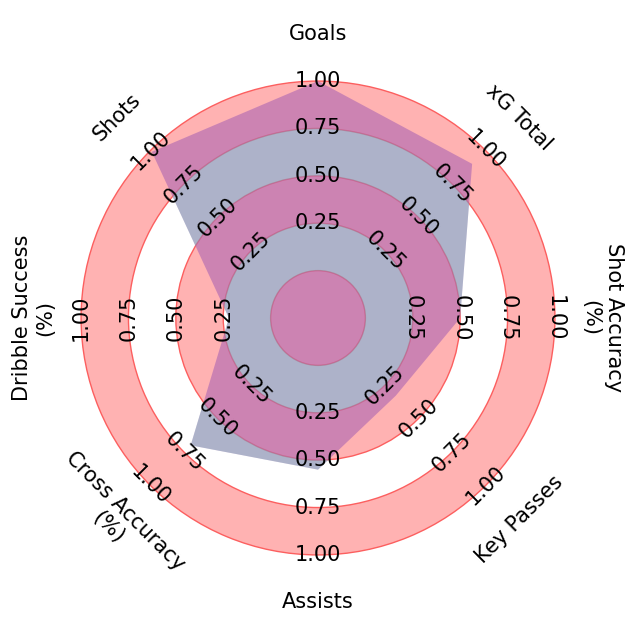

In [61]:
from mplsoccer import Radar
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
params = ["Goals","xG Total", "Shot Accuracy (%)","Key Passes", "Assists","Cross Accuracy (%)","Dribble Success (%)","Shots"]

low = [0,0,0,0,0,0,0,0]
high = [1,1,1,1,1,1,1,1]
stat_list = np.clip([1, 0.9, 0.5, 0.33, 0.55, 0.7, 0.22, 0.99], low, high)
radar = Radar(params,min_range= low,max_range = high,num_rings=4, center_circle_radius=1)

fig,ax = radar.setup_axis(figsize=(8, 8))  # format axis as a radar
radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_poly, rings_outer, vertices = radar.draw_radar(stat_list, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2','alpha': 0.6},
                                kwargs_rings={'facecolor': '#66d8ba','alpha': 0.3})  # draw the radar

range_labels = radar.draw_range_labels(ax=ax, fontsize=15)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15)  # draw the param labels
plt.show()


In [ ]:
def extract_def_stats(df,player):
    player_df = df_event[df_event['player_name'] == player]

    tackles_attempted = len(player_df[player_df['type_name'] == "Duel"])
    tackles_won = len(player_df[(player_df['type_name'] == "Duel") & (player_df['outcome_name'].isna())])
    tackle_success = round(tackles_won / tackles_attempted * 100,2) if tackles_attempted> 0 else 0 

    interceptions = len(player_df[player_df['type_name'] == "Interception"])
    clearances = len(player_df[player_df['type_name'] == "Clearance"])
    blocks = len(player_df[player_df['type_name'] == "Block"])
    ball_recoveries = len(player_df[player_df['type_name'] == "Ball Recovery"])

    aerials_duels = len(player_df[(player_df['type_name'] == "Duel") & (player_df['aerial_won'].notna())])
    aerial_wins = len(player_df[(player_df['type_name'] == "Duel") & (player_df['aerial_won'] == True)])
    aerial_success = round(aerial_wins / aerials_duels * 100,2) if aerials_duels > 0 else 0 

    total_passes = len(player_df[(player_df['type_name'] == "Pass")])
    successful_passes = len(player_df[(player_df['type_name'] == "Pass") & (player_df['outcome_name'].isna())])
    pass_accuracy = round(successful_passes / total_passes * 100,2) if total_passes > 0 else 0

    def_stats = {
        "Tackles Won": tackles_won,
        "Tackles Success (%)": tackle_success,
        "Interceptions": interceptions,
        "Clearances": clearances,
        "Blocks": blocks,
        "Ball Recovery": ball_recoveries,
        "Aerial Success (%)": aerial_success,
        "Pass Accuracy (%)": pass_accuracy
    }


{'Tackles Won': 1, 'Tackles Success (%)': 50.0, 'Interceptions': 0, 'Clearances': 5, 'Blocks': 0, 'Ball Recovery': 4, 'Aerial Success (%)': 0, 'Pass Accuracy (%)': 92.47}


In [ ]:
def extract_gk_stats(df,player):
    player_df = df[df['player_name'] == player]

    shots_faced = len(player_df[(player_df['type_name'] == 'Shot') & (player_df['position_name'] == "Goalkeeper")])
    saves = len(player_df[(player_df['type_name'] == 'Shot') & (player_df['outcome_name'] == "Saved") & (player_df['position_name'] == "Goalkeeper")])
    goals_conceded = len(player_df[(player_df['type_name'] == 'Shot') & (player_df['outcome_name'] == "Goal") & (player_df['position_name'] == "Goalkeeper")])

    save_percent = round(saves / shots_faced * 100,2) if shots_faced > 0 else 0

    total_passes = len(player_df[(player_df['type_name'] == 'Pass') & (player_df['position_name'] == "Goalkeeper")])
    successful_passes = len(player_df[(player_df['type_name'] == 'Pass') &(player_df['outcome_name'].isna()) &  (player_df['position_name'] == "Goalkeeper")])
    pass_accuracy = round(successful_passes / total_passes * 100,2) if total_passes > 0 else 0

    long_passes = len(player_df[(player_df['type_name'] == 'Pass') &(player_df['pass_length'] > 30) &  (player_df['position_name'] == "Goalkeeper")])
    successful_long_passes = len(player_df[(player_df['type_name'] == 'Pass') &(player_df['pass_length'] > 30) & (player_df['outcome_name'].isna()) & (player_df['position_name'] == "Goalkeeper")])
    long_pass_accuracy = round(successful_long_passes / long_passes * 100,2) if long_passes > 0 else 0

    crosses_claimed = len(player_df[(player_df['type_name'] == "Goalkeeper") & (player_df['sub_type_name'] == 'Claim')])
    punches = len(player_df[(player_df['type_name'] == "Goalkeeper") & (player_df['sub_type_name'] == 'Punch')])

    gk_stats = {
        "Save Percentage (%)": save_percent,
        "Goals Conceded": -goals_conceded,
        "Saves": saves,
        "Pass Accuracy (%)": pass_accuracy,
        "Long Passs Accuracy (%)": long_pass_accuracy,
        "Cross Claimed": crosses_claimed,
        "Punches": punches,
        "Total Passes": total_passes
    }

    return gk_stats



{'Save Percentage (%)': 0, 'Goals Conceded': 0, 'Saves': 0, 'Pass Accuracy (%)': 93.33, 'Long Passs Accuracy (%)': 66.67, 'Cross Claimed': 0, 'Punches': 0, 'Total Passes': 15}


In [45]:
player = "Angus Gunn"
saves = len(df_event.query("type_name == 'Goal Keeper' and sub_type_name == 'Shot Saved' and player_name == @player "))
saves

5

10

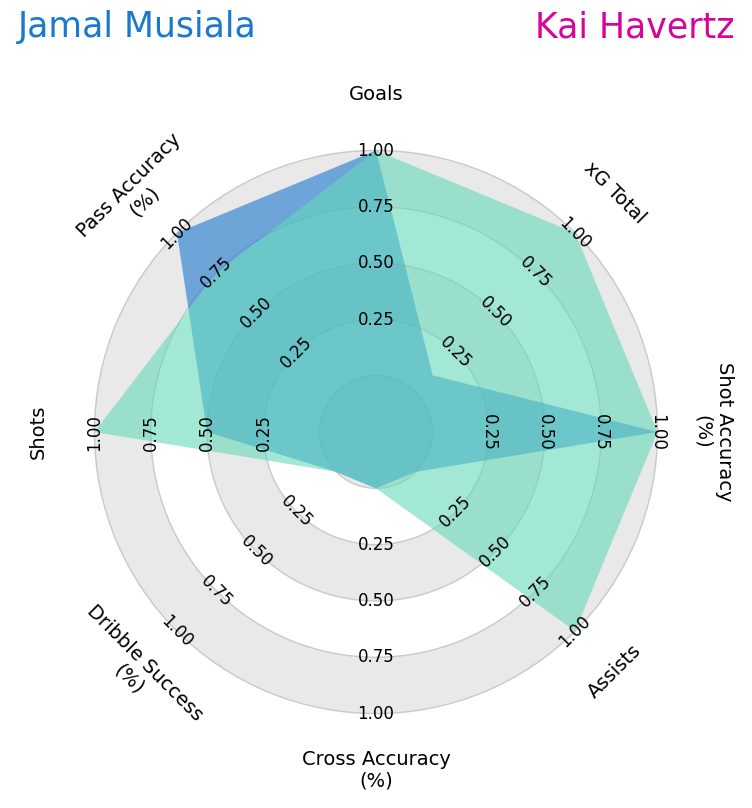

In [ ]:
from mplsoccer import Radar, grid
def extract_att_stats(df,player):
    player_df = df[df['player_name'] == player]

    shots = len(player_df[player_df['type_name'] == 'Shot'])
    goals = len(player_df[(player_df['type_name'] == 'Shot') & (player_df['outcome_name'] == "Goal")])
    xg_total = round(player_df[player_df['type_name'] == 'Shot']['shot_statsbomb_xg'].sum(),2)
    xg_per_shot = xg_total / shots if shots > 0 else 0
    shot_on_target = len(player_df[(player_df['type_name'] == "Shot") & (player_df['outcome_name'] == "Goal") | (player_df['outcome_name'] == "Saved")])
    shot_accuracy = round(shot_on_target / shots * 100,2) if shots > 0 else 0 

    assists = len(player_df[(player_df['type_name'] == "Pass") & (player_df['pass_goal_assist'] == True)])
    crosses = len(player_df[(player_df['type_name'] == "Pass") & (player_df['pass_cross'] == True)])
    successful_crosses = len(player_df[(player_df['type_name'] == "Pass") & (player_df['pass_cross'] == True) & (player_df['outcome_name'].isna())])
    cross_accuracy = round(successful_crosses / crosses * 100,2) if crosses > 0 else 0

    dribbles_attempted = len(player_df[player_df['type_name'] == "Dribble"])
    dribbles_completed = len(player_df[(player_df['type_name'] == "Dribble") & (player_df['outcome_name'].isna())])
    dribble_success = round(dribbles_completed / dribbles_attempted * 100,2) if  dribbles_attempted > 0 else 0

    total_passes = len(player_df[(player_df['type_name'] == "Pass")])
    successful_passes = len(player_df[(player_df['type_name'] == "Pass") & (player_df['outcome_name'].isna())])
    pass_accuracy = round(successful_passes / total_passes * 100,2) if total_passes > 0 else 0

    att_stats = {
        "Goals": goals,
        "xG Total": xg_total,
        "Shot Accuracy (%)": shot_accuracy,
        "Assists": assists,
        "Cross Accuracy (%)": cross_accuracy,
        "Dribble Success (%)": dribble_success,
        "Shots": shots,
        "Pass Accuracy (%)": pass_accuracy
    }

    return att_stats
    
def create_attacker_radar(df, player1_name, player2_name):
    """Create radar chart comparing two attacking players using mplsoccer"""
    # Extract player stats
    player1_stats = extract_att_stats(df, player1_name)
    player2_stats = extract_att_stats(df, player2_name)
    
    # Parameters for attackers
    params = list(player1_stats.keys())
    player1_values = [player1_stats[param] for param in params]
    player2_values = [player2_stats[param] for param in params]
    
    # Normalize values to 0-1 range
    max_values = [max(player1_stats[param], player2_stats[param]) for param in params]
    normalized_player1_values = [value / max_val if max_val > 0 else 0 for value, max_val in zip(player1_values, max_values)]
    normalized_player2_values = [value / max_val if max_val > 0 else 0 for value, max_val in zip(player2_values, max_values)]

    
    # Create radar chart
    radar = Radar(params, [0] * len(params), [1]* len(params), num_rings=4, ring_width=1, center_circle_radius=1)
    
    # Create figure and axis
    fig, axs = grid(figheight=8, grid_height=0.915, title_height=0.06, title_space=0.01, grid_key='radar', axis=False)
    
    
    # Plot radar
    radar.setup_axis(ax=axs['radar']) 
    radar.draw_circles(ax=axs['radar'], facecolor="#e9e9e9", edgecolor="#c9c9c9")
    radar_poly, radar_poly2, vertices1, vertices2 = radar.draw_radar_compare(normalized_player1_values, normalized_player2_values, ax=axs['radar'],
                                                            kwargs_radar={'facecolor': '#1a78cf', 'alpha': 0.6},
                                                            kwargs_compare={'facecolor': '#66d8ba', 'alpha': 0.6})
    
    # Add title
    axs['title'].text(0.01, 0.65, player1_name, fontsize=25, color='#1a78cf', ha='left', va='center')
    axs['title'].text(0.99, 0.65, player2_name, fontsize=25, ha='right', va='center', color='#d80499')
    
    # Draw parameter and range labels
    radar.draw_range_labels(ax=axs['radar'], fontsize=12)
    radar.draw_param_labels(ax=axs['radar'], fontsize=14)
    
    return fig
# Example usage
player1 = "Jamal Musiala"
player2 = "Kai Havertz"
fig = create_attacker_radar(df_event, player1, player2) 

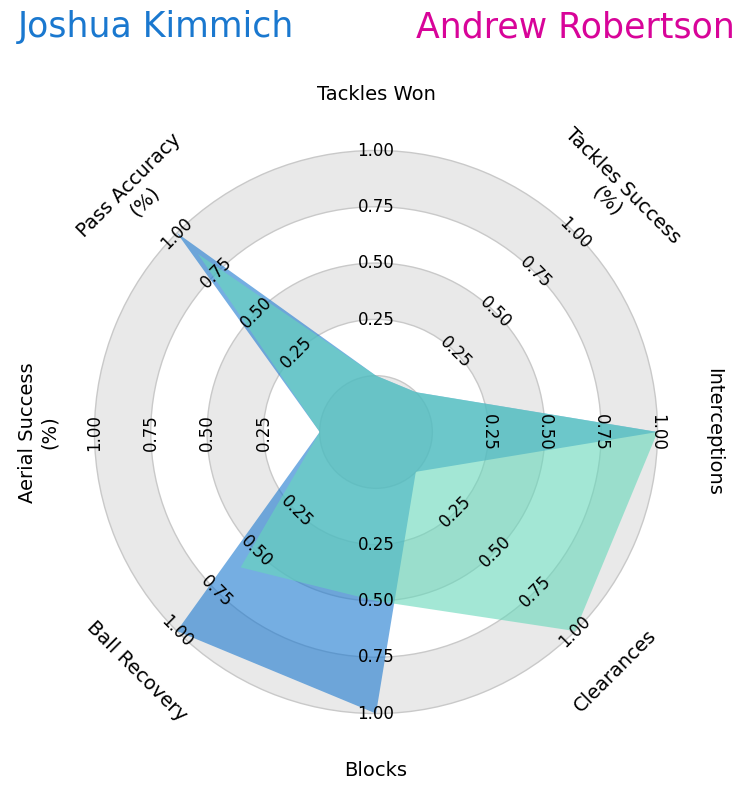

In [91]:
def extract_def_stats(df,player):
    player_df = df[df['player_name'] == player]

    tackles_attempted = len(player_df[player_df['type_name'] == "Duel"])
    tackles_won = len(player_df[(player_df['type_name'] == "Duel") & (player_df['outcome_name'].isna())])
    tackle_success = round(tackles_won / tackles_attempted * 100,2) if tackles_attempted> 0 else 0 

    interceptions = len(player_df[player_df['type_name'] == "Interception"])
    clearances = len(player_df[player_df['type_name'] == "Clearance"])
    blocks = len(player_df[player_df['type_name'] == "Block"])
    ball_recoveries = len(player_df[player_df['type_name'] == "Ball Recovery"])

    aerials_duels = len(player_df[(player_df['type_name'] == "Duel") & (player_df['aerial_won'].notna())])
    aerial_wins = len(player_df[(player_df['type_name'] == "Duel") & (player_df['aerial_won'] == True)])
    aerial_success = round(aerial_wins / aerials_duels * 100,2) if aerials_duels > 0 else 0 

    total_passes = len(player_df[(player_df['type_name'] == "Pass")])
    successful_passes = len(player_df[(player_df['type_name'] == "Pass") & (player_df['outcome_name'].isna())])
    pass_accuracy = round(successful_passes / total_passes * 100,2) if total_passes > 0 else 0

    def_stats = {
        "Tackles Won": tackles_won,
        "Tackles Success (%)": tackle_success,
        "Interceptions": interceptions,
        "Clearances": clearances,
        "Blocks": blocks,
        "Ball Recovery": ball_recoveries,
        "Aerial Success (%)": aerial_success,
        "Pass Accuracy (%)": pass_accuracy
    }

    return def_stats



def create_def_radar(df, player1_name, player2_name):
    """Create radar chart comparing two attacking players using mplsoccer"""
    # Extract player stats
    player1_stats = extract_def_stats(df, player1_name)
    player2_stats = extract_def_stats(df, player2_name)
    
    # Parameters for attackers
    params = list(player1_stats.keys())
    player1_values = [player1_stats[param] for param in params]
    player2_values = [player2_stats[param] for param in params]
    
    # Normalize values to 0-1 range
    max_values = [max(player1_stats[param], player2_stats[param]) for param in params]
    normalized_player1_values = [value / max_val if max_val > 0 else 0 for value, max_val in zip(player1_values, max_values)]
    normalized_player2_values = [value / max_val if max_val > 0 else 0 for value, max_val in zip(player2_values, max_values)]

    
    # Create radar chart
    radar = Radar(params, [0] * len(params), [1]* len(params), num_rings=4, ring_width=1, center_circle_radius=1)
    
    # Create figure and axis
    fig, axs = grid(figheight=8, grid_height=0.915, title_height=0.06, title_space=0.01, grid_key='radar', axis=False)
    
    
    # Plot radar
    radar.setup_axis(ax=axs['radar']) 
    radar.draw_circles(ax=axs['radar'], facecolor="#e9e9e9", edgecolor="#c9c9c9")
    radar_poly, radar_poly2, vertices1, vertices2 = radar.draw_radar_compare(normalized_player1_values, normalized_player2_values, ax=axs['radar'],
                                                            kwargs_radar={'facecolor': '#1a78cf', 'alpha': 0.6},
                                                            kwargs_compare={'facecolor': '#66d8ba', 'alpha': 0.6})
    
    # Add title
    axs['title'].text(0.01, 0.65, player1_name, fontsize=25, color='#1a78cf', ha='left', va='center')
    axs['title'].text(0.99, 0.65, player2_name, fontsize=25, ha='right', va='center', color='#d80499')
    
    # Draw parameter and range labels
    radar.draw_range_labels(ax=axs['radar'], fontsize=12)
    radar.draw_param_labels(ax=axs['radar'], fontsize=14)
    
    return fig


player1 = "Joshua Kimmich"
player2 = "Andrew Robertson"
fig = create_def_radar(df_event,player1,player2)

TypeError: draw_radar() got an unexpected keyword argument 'kwargs_outline'

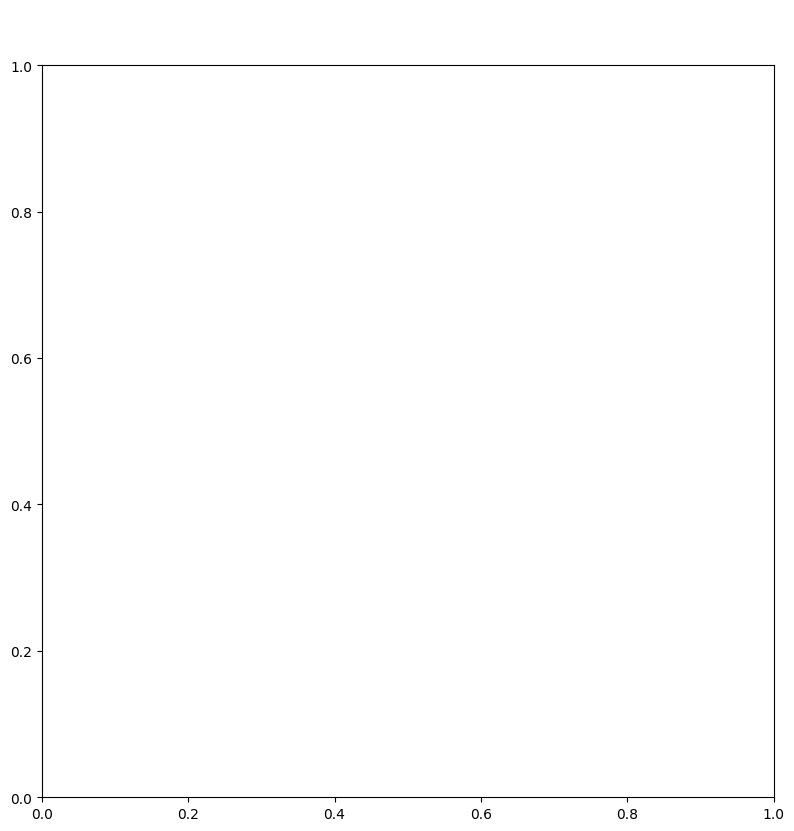

In [ ]:
def extract_gk_stats(df,player):
    gk_events = df.query("player_name ==@player and type_name == 'Goal Keeper'")
    shots_faced = len(gk_events.query("sub_type_name == 'Shot Faced'"))
    saves = len(gk_events.query("sub_type_name == 'Shot Saved'"))
    goals_conceded = saves = len(gk_events.query(" sub_type_name == 'Goal Conceded' "))
    crosses_claimed = saves = len(gk_events.query(" outcome_name == 'Claim'"))

    save_percent = round(saves / shots_faced * 100,2) if shots_faced > 0 else 0

    player_df = df[df['player_name'] == player]
    total_passes = len(player_df[(player_df['type_name'] == 'Pass') & (player_df['position_name'] == "Goalkeeper")])
    successful_passes = len(player_df[(player_df['type_name'] == 'Pass') &(player_df['outcome_name'].isna()) &  (player_df['position_name'] == "Goalkeeper")])
    pass_accuracy = round(successful_passes / total_passes * 100,2) if total_passes > 0 else 0

    long_passes = len(player_df[(player_df['type_name'] == 'Pass') & (player_df['pass_length'] > 35.0) &  (player_df['position_name'] == "Goalkeeper")])
    successful_long_passes = len(player_df[(player_df['type_name'] == 'Pass') &(player_df['pass_length'] > 35.0) & (player_df['outcome_name'].isna()) & (player_df['position_name'] == "Goalkeeper")])
    long_pass_accuracy = round(successful_long_passes / long_passes * 100,2) if long_passes > 0 else 0

    gk_stats = {
        "Save Percentage (%)": save_percent,
        "Goals Conceded": -goals_conceded,
        "Saves": saves,
        "Pass Accuracy (%)": pass_accuracy,
        "Long Passs Accuracy (%)": long_pass_accuracy,
        "Cross Claimed": crosses_claimed,
        "Total Passes": total_passes
    }

    return gk_stats


def create_gk_radar(df, player1_name, player2_name):
    """Create radar chart comparing two attacking players using mplsoccer"""
    # Extract player stats
    player1_stats = extract_gk_stats(df, player1_name)
    player2_stats = extract_gk_stats(df, player2_name)
    
    # Parameters for attackers
    params = list(player1_stats.keys())
    player1_values = [player1_stats[param] for param in params]
    player2_values = [player2_stats[param] for param in params]
    
    # # Normalize values to 0-1 range
    # max_values = [max(player1_stats[param], player2_stats[param]) for param in params]
    # normalized_player1_values = [value / max_val if max_val > 0 else 0 for value, max_val in zip(player1_values, max_values)]
    # normalized_player2_values = [value / max_val if max_val > 0 else 0 for value, max_val in zip(player2_values, max_values)]

    # Improved normalization
    normalized_player1_values = []
    normalized_player2_values = []
    
    for param, value1, value2 in zip(params, player1_values, player2_values):
        if "%" in param:  # Percentage-based parameters
            normalized_player1_values.append(value1 / 100)
            normalized_player2_values.append(value2 / 100)
        elif param == "Goals Conceded":  # Negative parameter (lower is better)
            max_val = max(value1, value2)
            normalized_player1_values.append(1 - (value1 / max_val if max_val > 0 else 0))
            normalized_player2_values.append(1 - (value2 / max_val if max_val > 0 else 0))
        else:  # Numeric parameters
            max_val = max(value1, value2)
            normalized_player1_values.append(value1 / max_val if max_val > 0 else 0)
            normalized_player2_values.append(value2 / max_val if max_val > 0 else 0)

    
    # Create radar chart
    radar = Radar(params, [0] * len(params), [1]* len(params), num_rings=4, ring_width=1, center_circle_radius=1)
    
    # Create figure and axis
    fig, axs = grid(figheight=8, grid_height=0.915, title_height=0.06, title_space=0.01, grid_key='radar', axis=False)
    
    
    # Plot radar
    radar.setup_axis(ax=axs['radar']) 
    radar.draw_circles(ax=axs['radar'], facecolor="#e9e9e9", edgecolor="#c9c9c9")
    radar_poly, radar_poly2, vertices1, vertices2 = radar.draw_radar_compare(normalized_player1_values, normalized_player2_values, ax=axs['radar'],
                                                            kwargs_radar={'facecolor': '#1a78cf', 'alpha': 0.6},
                                                            kwargs_compare={'facecolor': '#66d8ba', 'alpha': 0.6})

    
    
    # Add title
    axs['title'].text(0.01, 0.65, player1_name, fontsize=25, color='#1a78cf', ha='left', va='center')
    axs['title'].text(0.99, 0.65, player2_name, fontsize=25, ha='right', va='center', color='#66d8ba')
    
    # Draw parameter and range labels
    radar.draw_range_labels(ax=axs['radar'], fontsize=12)
    radar.draw_param_labels(ax=axs['radar'], fontsize=14)
    
    return fig

player1 = "Manuel Neuer"
player2 = "Angus Gunn"
fig = create_gk_radar(df_event,player1,player2)

In [95]:
b = df_event.loc[df_event['position_name'] == "Goalkeeper", 'player_name'].sort_values().unique()
print(b)

['Angus Gunn' 'Manuel Neuer']


In [96]:
def_pos = ['Left Back','Right Back','Center Back','Left Center Back','Right Center Back','Left Wing Back','Right Wing Back']
c = df_event[df_event['position_name'].isin(def_pos)]['player_name'].sort_values().unique()
print(c)

['Andrew Robertson' 'Anthony Ralston' 'Antonio Rüdiger'
 'Grant Campbell Hanley' 'Jack Hendry' 'Jonathan Tah' 'Joshua Kimmich'
 'Kieran Tierney' 'Maximilian Mittelstädt' 'Ryan Porteous' 'Scott McKenna']


In [98]:
not_att_pos = ['Goalkeeper','Left Back','Right Back','Center Back','Left Center Back','Right Center Back','Left Wing Back','Right Wing Back']
d = df_event[~df_event['position_name'].isin(not_att_pos)]['player_name'].dropna().sort_values().unique()
print(d)

['Billy Gilmour' 'Callum McGregor' 'Che Adams' 'Emre Can' 'Florian Wirtz'
 'Jamal Musiala' 'John McGinn' 'Kai Havertz' 'Kenneth McLean'
 'Lawrence Shankland' 'Leroy Sané' 'Niclas Füllkrug' 'Pascal Groß'
 'Robert Andrich' 'Ryan Christie' 'Scott McTominay' 'Thomas Müller'
 'Toni Kroos' 'İlkay Gündoğan']


In [ ]:
@st.cache_data
def most_cs(df):
    # Filter goalkeepers and their matches
    goalkeepers = df[df['position_name'] == "Goalkeeper"][['match_id', 'player_name', 'team_name']]

    # Filter goals and include only those scored against a goalkeeper
    goals_conceded = df[(df['type_name'] == 'Shot') & (df['outcome_name'] == "Goal")][['match_id', 'player_name']]

    # Merge goalkeepers with goals conceded to identify matches where goals were conceded
    conceded_matches = goalkeepers.merge(goals_conceded, on=['match_id', 'player_name'], how='inner')

    # Exclude matches where goals were conceded
    clean_sheets = goalkeepers[~goalkeepers['match_id'].isin(conceded_matches['match_id'])]

    # Count clean sheets for each goalkeeper
    clean_sheet_cnt = clean_sheets.groupby(['team_name', 'player_name']).size().reset_index(name="Clean_Sheets")

    # Handle case where no clean sheets are recorded
    if clean_sheet_cnt.empty:
        return {"message": "No clean sheets were recorded in this tournament."}

    # Get the goalkeeper with the most clean sheets
    top_clean_sheet_gk = clean_sheet_cnt.loc[clean_sheet_cnt['Clean_Sheets'].idxmax()]

    return {
        "team": top_clean_sheet_gk['team_name'],
        "player": top_clean_sheet_gk['player_name'],
        "clean_sheets": int(top_clean_sheet_gk['Clean_Sheets'])
    }

In [106]:
df_extra,df_related, df_freeze, df_tactics = sb.event(3938643)
df_extra.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,injury_stoppage_in_chain,shot_one_on_one,block_deflection,foul_committed_offensive,foul_committed_penalty,foul_won_penalty,substitution_replacement_id,substitution_replacement_name,pass_no_touch,shot_deflected
0,e99adb6b-ab54-4e4f-8219-d6ac82bb1df8,1,1,00:00:00,0,0,1,0.000000,3938643,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9842fa31-0f2c-4d4a-87ac-a9513b880266,2,1,00:00:00,0,0,1,0.000000,3938643,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e4b27a22-b247-4eeb-b0ba-b1b81939e89c,3,1,00:00:00,0,0,1,0.000000,3938643,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a1411d49-c9e4-4d5d-9900-2af4c11aa0b4,4,1,00:00:00,0,0,1,0.000000,3938643,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36efd27b-ca2e-405b-b5e5-ba46c615e136,5,1,00:00:00.420000,0,0,2,0.308025,3938643,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df_extra.tail(5)

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,shot_first_time,dribble_nutmeg,dribble_overrun,pass_cut_back,substitution_replacement_id,substitution_replacement_name,foul_committed_card_id,foul_committed_card_name,pass_deflected,shot_one_on_one
5185,8b116c6b-3513-4da8-8b38-2790478913cf,5186,5,00:06:22.917000,126,22,185,0.000000,3942349,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5186,7936f7c8-52e0-4f3e-b794-fc0ec7e67674,5187,5,00:07:16.975000,127,16,186,0.580131,3942349,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5187,f79ed0a2-31c3-42d8-9f67-c61b569935e3,5188,5,00:07:17.555000,127,17,186,0.000000,3942349,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5188,af1ec783-d64a-400a-a418-c637f63a13f0,5189,5,00:07:18.734000,127,18,186,0.000000,3942349,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5189,48ac6a96-0e3c-472a-b8d1-b4d48371efe4,5190,5,00:07:18.734000,127,18,186,0.000000,3942349,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df_extra.to_csv('francepoland.csv')